In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [9]:
df.shape

(150, 6)

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [11]:
df = df.drop(columns = ['Id'])

In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: >

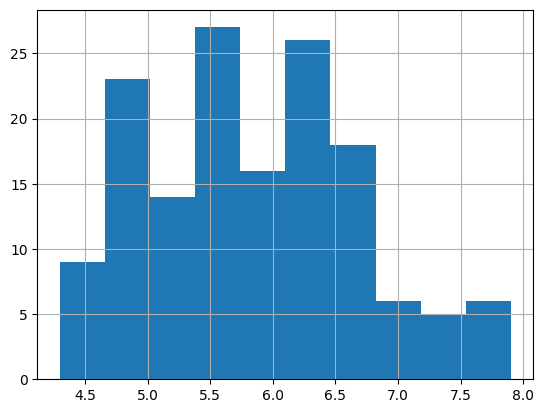

In [15]:
df['SepalLengthCm'].hist()

In [16]:
color = ['red', 'orange', 'blue']
species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica" ]

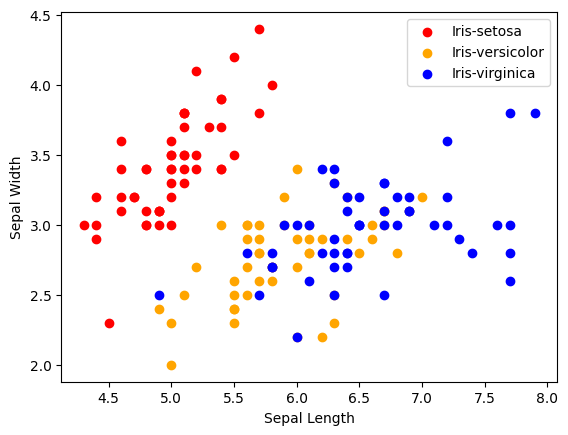

In [22]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

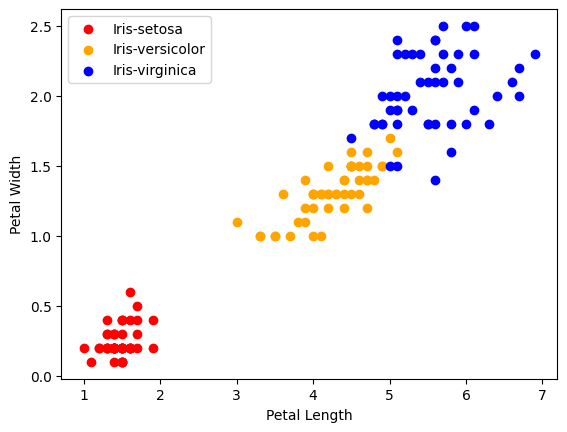

In [23]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

<ipython-input-26-4ec3498086a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

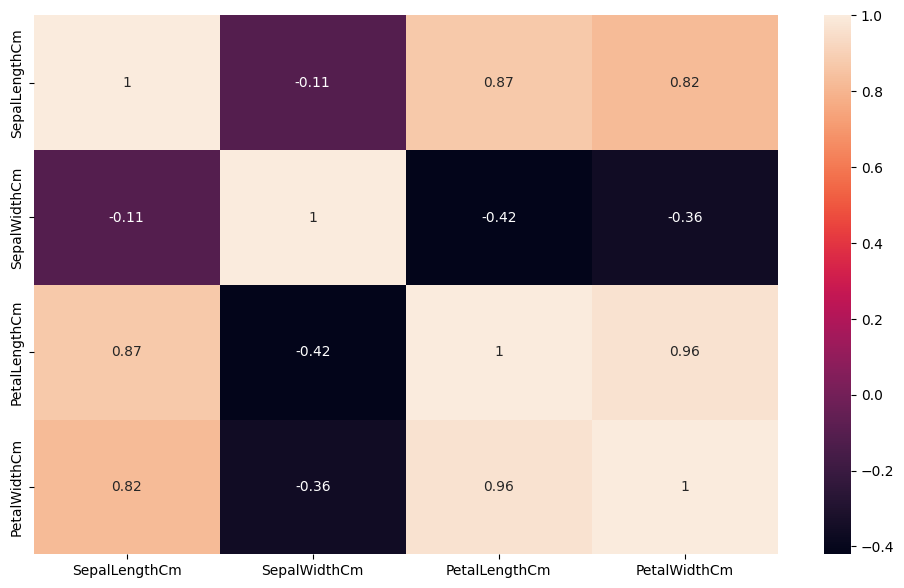

In [26]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12,7))
sn.heatmap(corr,annot=True, ax=ax)

In [27]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [28]:
df['Species'] = l.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Species'])
y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [32]:
print(x.shape, x_train.shape,x_test.shape)

(150, 4) (105, 4) (45, 4)


In [35]:
y_train

13     0
15     0
61     1
91     1
116    2
      ..
50     1
87     1
104    2
129    2
122    2
Name: Species, Length: 105, dtype: int64

In [36]:
y_test

128    2
18     0
130    2
105    2
107    2
78     1
83     1
14     0
5      0
133    2
25     0
11     0
12     0
63     1
113    2
34     0
60     1
2      0
24     0
123    2
35     0
124    2
68     1
26     0
29     0
19     0
41     0
16     0
20     0
101    2
84     1
47     0
108    2
1      0
93     1
144    2
125    2
92     1
86     1
46     0
135    2
7      0
65     1
10     0
132    2
Name: Species, dtype: int64

#LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

In [49]:
m.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
print("Accuracy: ",m.score(x_test,y_test))

Accuracy:  0.9777777777777777


#KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
mm = KNeighborsClassifier()

In [42]:
mm.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
print("Accuracy: ",mm.score(x_test,y_test))

Accuracy:  0.9777777777777777


#Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
mmm  = DecisionTreeClassifier()

In [45]:
mmm.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
print("Accuracy: ",mmm.score(x_test,y_test))

Accuracy:  0.9777777777777777
